<a href="https://colab.research.google.com/github/ahmetcanerdem/Bil470Proje/blob/master/Transfer%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install  kaggle
import tensorflow as tf
from google.colab import files

from IPython.display import clear_output

### **Aşağıdaki Tüm Kod Veriyi Oluşturma, CNN oluşturma ve callback-treshold parametreleri için en uygun değerleri seçme ve bunların grafiğini çıkarmaya yöneliktir**

In [2]:
#clear_output()
#files.upload()
#!cd drive
#!cd "My Drive"
#!mkdir data
#!cd data
#! mkdir ~/.kaggle
#! cp kaggle.json ~/.kaggle/
#! chmod 600 ~/.kaggle/kaggle.json
#! kaggle datasets list

In [3]:
#! kaggle competitions download -c siim-isic-melanoma-classification
#clear_output()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
#! mkdir train_t
#! unzip "*.dcm.zip" -d train

#clear_output()

In [6]:
#!pip install pydicom
#import pydicom as dicom
import matplotlib.pyplot as plt
clear_output()

In [7]:
#image_path = './train/ISIC_0015719.dcm'
#ds = dicom.dcmread(image_path)

#plt.imshow(ds.pixel_array)

In [8]:
#ds.PatientID[1:-1]

In [9]:
import os
from PIL import Image
import numpy as np

In [39]:
input_size=(256,256)
test_path=''
test_path='./drive/My Drive/test/'
training_path='./drive/My Drive/train/'
train_0_p=training_path+'train_0/'
train_1_p=training_path+'train_1_large/'
test_0_path= test_path + 'train_0_test/'
test_1_path= test_path + 'train_1_test_large/'
treshold=0.85

In [11]:
DATA=[]
classvector=[]
c=0
first=0;
second=0;
for i in os.listdir(train_0_p):
  clear_output(wait=True)
  print(c)
  c= c+1
  first=first+1;
  path= train_0_p + i
  im=Image.open(path)
  im=im.resize(input_size)
  im=np.array(im)
  im=np.array(im,dtype='float64')
  im = im/255
  DATA.append(im)
  classvector.append(0)
  if(first>500):
    break
  if (c>1000):
    break;
DATA[0]

print("0 verisi bitti, 1 verisi alınıyor")
for i in os.listdir(train_1_p):
  clear_output(wait=True)
  print(c)
  c= c+1
  second=second+1
  path= train_1_p + i
  im=Image.open(path)
  im=im.resize(input_size)
  im=np.array(im)
  im=np.array(im,dtype='float64')
  im = im/255
  DATA.append(im)
  classvector.append(1)
  if(second>500):
    break
  if (c>1000):
    break;
print("Hasta olmayan verilerden :" + str(first) + " kadar alındı")
print("Hasta olan verilerden :" + str(second) + " kadar alındı")

998
Hasta olmayan verilerden :501 kadar alındı
Hasta olan verilerden :498 kadar alındı


In [12]:
DATA=np.reshape(DATA,newshape=(-1,input_size[0],input_size[1],3))

In [13]:
print(len(DATA))
print(len(classvector))


999
999


In [14]:
classvector=np.array(classvector)

In [15]:
#imdata=DATA*255
#imdata=np.array(imdata,dtype='uint8')
#plt.imshow(imdata[0])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        4

### **Bu andan itibaren Transfer Learning modelleri incelenecek**

In [23]:
## Burada devam etmek için Inception v3 ten Transfer Learning uygulayacağım
import os
from tensorflow.keras import layers
from tensorflow.keras import Model

##iv3 ün weight değerleri
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
from tensorflow.keras.applications.inception_v3 import InceptionV3

weight_file= '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
image_dim=3

--2020-07-22 23:42:30--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 172.217.212.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   358MB/s    in 0.2s    

2020-07-22 23:42:30 (358 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [27]:
model_I3_trained= InceptionV3(input_shape= (input_size[0], input_size[1],image_dim),
                      include_top= False,
                      weights= None
                      )

model_I3_trained.load_weights(weight_file)

In [28]:
for layer in model_I3_trained.layers:
  layer.trainable= False

In [29]:
model_I3_trained.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_98 (Conv2D)              (None, 127, 127, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 127, 127, 32) 96          conv2d_98[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 127, 127, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [33]:
from tensorflow.keras.optimizers import RMSprop

last_layer= model_I3_trained.get_layer('mixed10')
last_output= last_layer.output

x= layers.Flatten()(last_output)
x= layers.Dense(2048,activation='relu')(x)
x= layers.Dense(1, activation='sigmoid')(x)

In [44]:
model_T= Model(model_I3_trained.input, x)
model_T.compile(optimizer=RMSprop(lr=0.0001), loss='binary_crossentropy', metrics=['acc'])

In [45]:
model_T.fit(DATA, classvector, epochs=50)

Epoch 1/50
32/32 [==============================] - 3s 96ms/step - loss: 3.7466 - acc: 0.5976
Epoch 2/50
32/32 [==============================] - 3s 89ms/step - loss: 0.7225 - acc: 0.6827
Epoch 3/50
32/32 [==============================] - 3s 89ms/step - loss: 0.5761 - acc: 0.7437
Epoch 4/50
32/32 [==============================] - 3s 88ms/step - loss: 0.5247 - acc: 0.7768
Epoch 5/50
32/32 [==============================] - 3s 88ms/step - loss: 0.4834 - acc: 0.7828
Epoch 6/50
32/32 [==============================] - 3s 88ms/step - loss: 0.3249 - acc: 0.8509
Epoch 7/50
32/32 [==============================] - 3s 89ms/step - loss: 0.3281 - acc: 0.8709
Epoch 8/50
32/32 [==============================] - 3s 89ms/step - loss: 0.2385 - acc: 0.9029
Epoch 9/50
32/32 [==============================] - 3s 88ms/step - loss: 0.1854 - acc: 0.9309
Epoch 10/50
32/32 [==============================] - 3s 88ms/step - loss: 0.1669 - acc: 0.9590
Epoch 11/50
32/32 [==============================] - 3s 88m

In [40]:
DATA_TEST=[]
DATA_TEST_0=[]
DATA_TEST_1=[]
classvector_test=[]
classvector_test_0=[]
classvector_test_1=[]
c=0
first=0;
second=0;
for i in os.listdir(test_0_path):
  clear_output(wait=True)
  print(c)
  c= c+1
  first=first+1;
  path= test_0_path + i
  im=Image.open(path)
  im=im.resize(input_size)
  im=np.array(im)
  im=np.array(im,dtype='float64')
  im = im/255
  DATA_TEST.append(im)
  DATA_TEST_0.append(im)
  classvector_test.append(0)
  classvector_test_0.append(0)
  if(first>100):
    break
  if (c>200):
    break;
DATA[0]

print("0 verisi bitti, 1 verisi alınıyor")
for i in os.listdir(test_1_path):
  clear_output(wait=True)
  print(c)
  c= c+1
  second=second+1
  path= test_1_path + i
  im=Image.open(path)
  im=im.resize(input_size)
  im=np.array(im)
  im=np.array(im,dtype='float64')
  im = im/255
  DATA_TEST.append(im)
  DATA_TEST_1.append(im)
  classvector_test.append(1)
  classvector_test_1.append(1)
  if(second>100):
    break
  if (c>200):
    break;
print("Hasta olmayan verilerden :" + str(first) + " kadar alındı")
print("Hasta olan verilerden :" + str(second) + " kadar alındı")

175
Hasta olmayan verilerden :101 kadar alındı
Hasta olan verilerden :75 kadar alındı


In [71]:
thVector=[];
DATA_TEST= np.array(DATA_TEST).reshape(-1, input_size[0], input_size[1], image_dim)
DATA_TEST_0= np.array(DATA_TEST_0).reshape(-1, input_size[0], input_size[1], image_dim)
DATA_TEST_1= np.array(DATA_TEST_1).reshape(-1, input_size[0], input_size[1], image_dim)
pT= model_T.predict(DATA_TEST)
p0= model_T.predict(DATA_TEST_0)
p1= model_T.predict(DATA_TEST_1)

a_T=[]
a_0=[]
a_1=[]

for tresholdvalue in np.arange(0,1,0.1):
  ##############WHOLE TEST#####################
  vT=[]
  for i in pT:
    if (i>=tresholdvalue):
      vT.append(1)
    else:
      vT.append(0)
  c=0
  for i in range(len(vT)):
    if (vT[i] == classvector_test[i]):
      c = c+1;
  
  a_T.append(c/len(vT))

  ########################################

    ##############TRUE POSITIVE#####################
  v1=[]
  for i in p1:
    if (i>=tresholdvalue):
      v1.append(1)
    else:
      v1.append(0)
  c=0
  for i in range(len(v1)):
    if (v1[i] == classvector_test_1[i]):
      c = c+1;
  
  a_1.append(c/len(v1))

  ########################################

    ##############TRUE NEGATIVE#####################
  v0=[]
  for i in p0:
    if (i>=tresholdvalue):
      v0.append(1)
    else:
      v0.append(0)
  c=0
  for i in range(len(v0)):
    if (v0[i] == classvector_test[i]):
      c = c+1;
  
  a_0.append(c/len(v0))

  ########################################

  thVector.append(tresholdvalue)
    

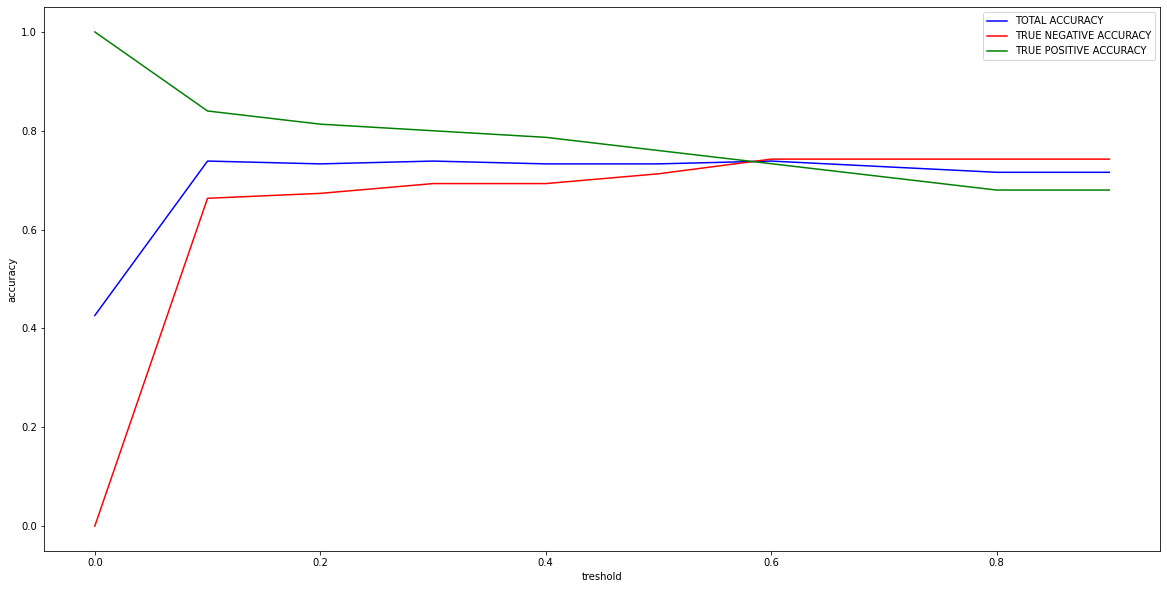

In [72]:
plt.figure(figsize=(20,10))
plt.ylabel('accuracy')
plt.xlabel('treshold')
plt.plot(thVector, a_T, 'b', label='TOTAL ACCURACY')
plt.plot(thVector, a_0, 'r', label='TRUE NEGATIVE ACCURACY')
plt.plot(thVector, a_1, 'g', label='TRUE POSITIVE ACCURACY')
plt.legend()
plt.show()

In [70]:
tresholdvalue=0.55
##############WHOLE TEST#####################
vT=[]
for i in pT:
  if (i>=tresholdvalue):
    vT.append(1)
  else:
     vT.append(0)
c=0
for i in range(len(vT)):
  if (vT[i] == classvector_test[i]):
      c = c+1;
print(str(tresholdvalue)+ "% treshold için isabet değeri:")
print(c/len(vT))

########################################

##############TRUE POSITIVE#####################
v1=[]
for i in p1:
  if (i>=tresholdvalue):
    v1.append(1)
  else:
    v1.append(0)
c=0
for i in range(len(v1)):
  if (v1[i] == classvector_test_1[i]):
    c = c+1;
  
print(str(tresholdvalue)+ "% treshold için TP isabet değeri:")
print(c/len(v1))

  ########################################

    ##############TRUE NEGATIVE#####################
v0=[]
for i in p0:
  if (i>=tresholdvalue):
    v0.append(1)
  else:
    v0.append(0)
c=0
for i in range(len(v0)):
  if (v0[i] == classvector_test[i]):
    c = c+1;
  
print(str(tresholdvalue)+ "% treshold için TN isabet değeri:")
print(c/len(v0))


0.55% treshold için isabet değeri:
0.7443181818181818
0.55% treshold için TP isabet değeri:
0.7466666666666667
0.55% treshold için TN isabet değeri:
0.7425742574257426
